In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import sys 
sys.path.append('../src')

In [45]:
from cnn_k4 import *
from cnn import *
from datas import *

In [46]:
bigwig_path = '../data/bws_for_predictor/SPT16_4D_2HdTAG_Sox2_S46_1_120_sorted.bw'
k4_bigwig_path= '../data/bws_for_predictor/SPT16_4D_2HdTAG_K4_S49_150_500_scaled.bw'
fasta_path = '../data/GRCm38.primary_assembly.genome.fa'
chrom = 'chr3'
window_size = 1000
stride = 1000
signal_bins = 100
batch_size = 128
epochs = 500
lr = 1e-3
device = 'cpu'
weight_decay = 1e-4

In [47]:
dataset = SequenceDualBigWigDataset(
    fasta_path=str(fasta_path),
    k4_bigwig_path=str(k4_bigwig_path),
    target_bigwig_path=str(bigwig_path),
    signal_bins=signal_bins,
    chrom=chrom,
    window_size=window_size,
    stride=stride
)

In [48]:
len(dataset)

80346

In [49]:
len(dataset.intervals[:100])

100

In [50]:
x, xm, y, y_count = next(iter(dataset))

x.shape, xm.shape, y.shape, y_count

(torch.Size([4, 1000]), torch.Size([100]), torch.Size([100]), tensor(26.2742))

In [51]:
dataset

In [52]:
# reduce training data to see if loss hits zero
dataset.intervals = dataset.intervals[:100]

In [53]:
config = TrainConfig(
    lr=lr,
    weight_decay=weight_decay,
    epochs=epochs,
    patience=epochs,
    device=device
)

In [54]:
import torch
torch.cuda.empty_cache() 

In [55]:
model = train_bpnet_k4(
    dataset=dataset,
    batch_size=batch_size,
    config=config,
)

Epoch 1/500 - train loss: 35908.6641, val loss: 34097.3711
Epoch 2/500 - train loss: 34971.8477, val loss: 34060.6797
Epoch 3/500 - train loss: 33429.4727, val loss: 33998.0703
Epoch 4/500 - train loss: 31068.8594, val loss: 33926.3711
Epoch 5/500 - train loss: 27976.1211, val loss: 33851.9023
Epoch 6/500 - train loss: 25346.2246, val loss: 33688.5117
Epoch 7/500 - train loss: 23615.3203, val loss: 33330.4961
Epoch 8/500 - train loss: 22313.0645, val loss: 32810.0117
Epoch 9/500 - train loss: 21531.6582, val loss: 32186.4434
Epoch 10/500 - train loss: 21006.9336, val loss: 31512.0254
Epoch 11/500 - train loss: 20564.1191, val loss: 30807.7695
Epoch 12/500 - train loss: 20160.6328, val loss: 30013.9590
Epoch 13/500 - train loss: 19783.0020, val loss: 29025.9414
Epoch 14/500 - train loss: 19409.3281, val loss: 27943.5547
Epoch 15/500 - train loss: 19019.3066, val loss: 26800.3223
Epoch 16/500 - train loss: 18643.5977, val loss: 25690.3867
Epoch 17/500 - train loss: 18259.9590, val loss: 

In [ ]:
import torch
import time
from pathlib import Path

date = time.strftime("%Y%m%d_%H")
output_model_path = Path(f'../models/seqk4_bpnet_{date}.pt')

save_model(model, output_model_path)

In [ ]:
model_path = '../models/seqk4_bpnet_20260128_23.pt'
model = load_model(model_path, device=device)

In [56]:
from torch.utils.data import DataLoader

loader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    num_workers=1
)


In [57]:
x, x_add, y_true, y_count = next(iter(loader))

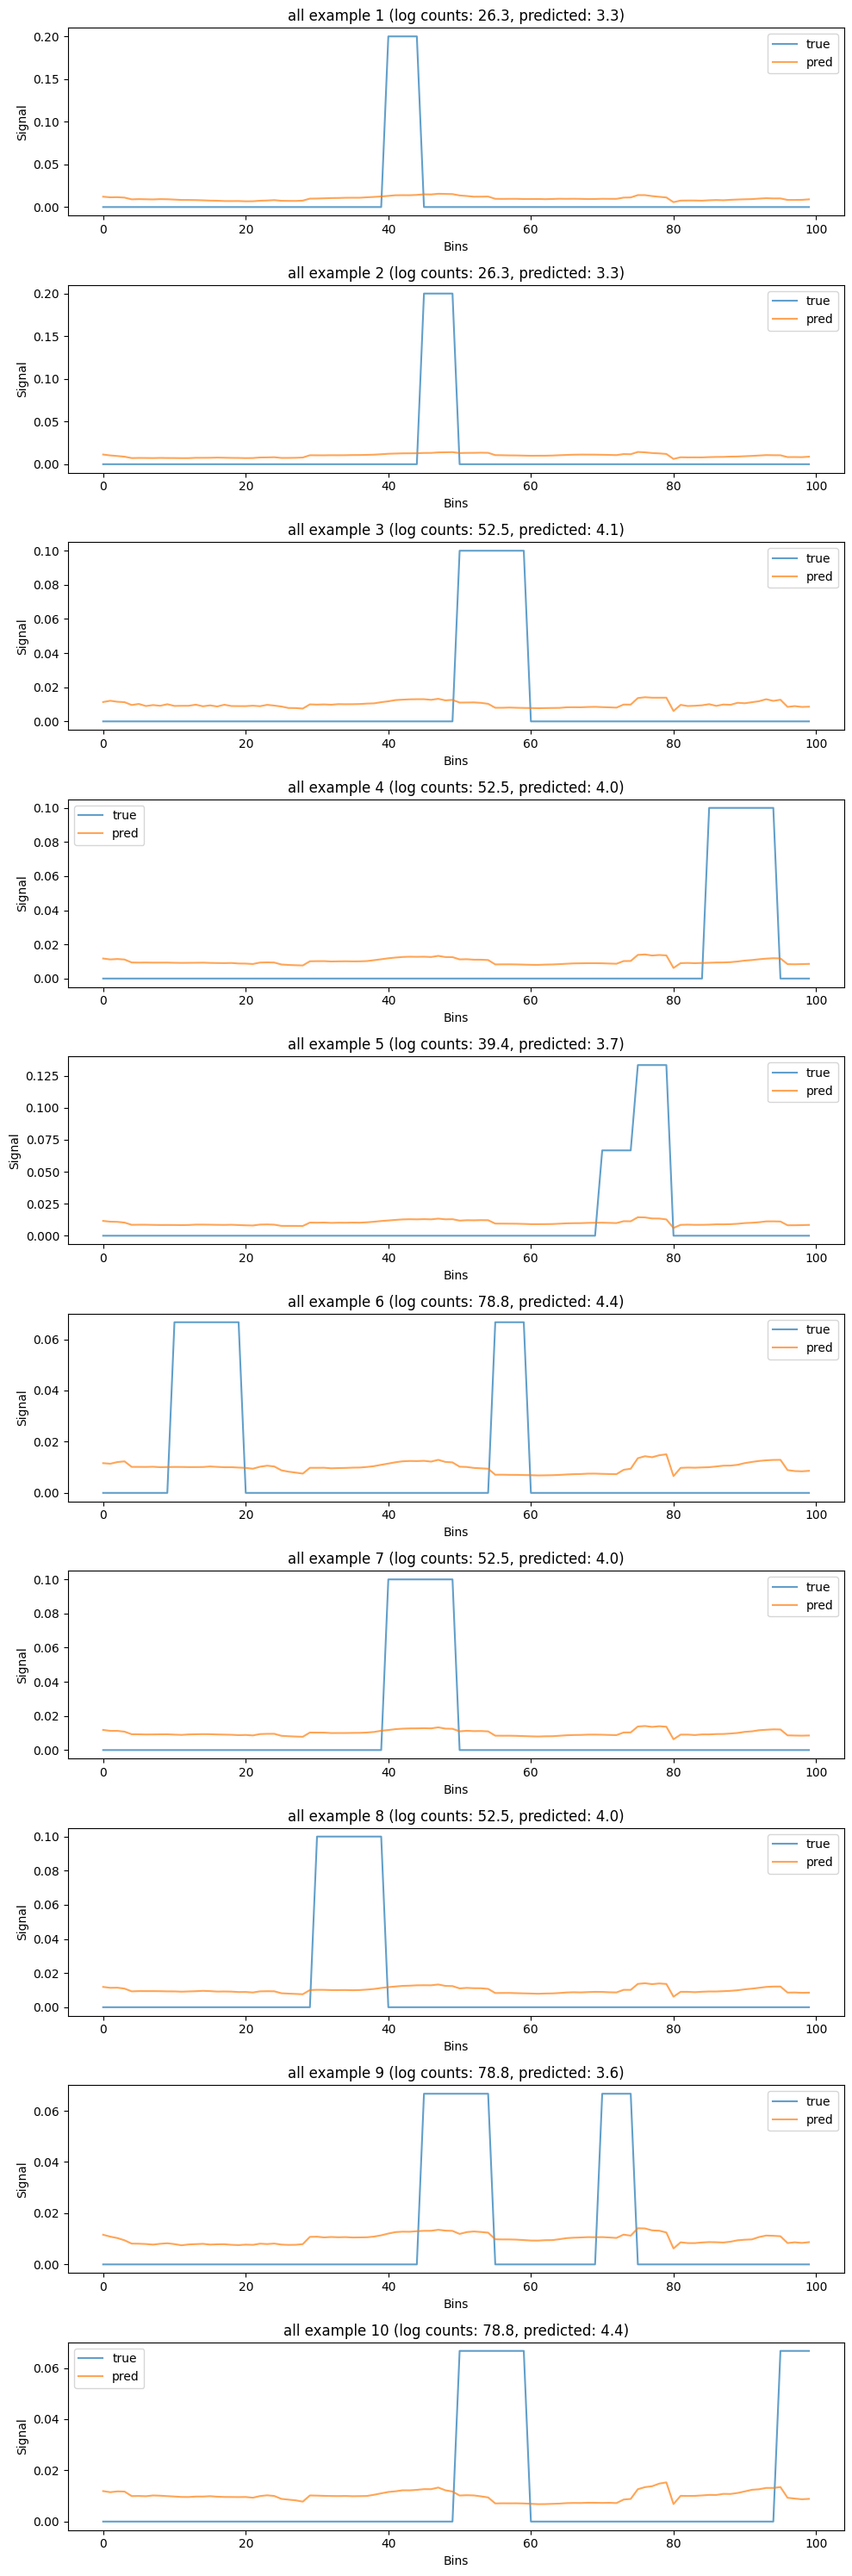

In [58]:
%matplotlib inline

visualize_split_predictions(
    model,
    device='cpu',
    n_examples_per_split=10,
    loader=loader
)